<a href="https://colab.research.google.com/github/madanmohan-venkatesan/notebooks/blob/main/sequential_testing_for_count_and_countinuous_data_using_ASOS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install ssrm-test

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from ssrm_test import ssrm_test

In [29]:
# Specifying the directories and paths
working_folder = Path(".")


data_folder = Path.joinpath(working_folder,"data")
data_folder.mkdir(parents=True, exist_ok=True)

abtest_metrics_local_path = Path.joinpath(data_folder,"asos_digital_experiments_dataset.parquet")
abtest_metrics_remote_path = "https://osf.io/62t7f/download"

# Download the dataset if it does not already exist
# The body of the if-statement is a shell command
if not abtest_metrics_local_path.exists():
    !wget -O $abtest_metrics_local_path $abtest_metrics_remote_path

# Load the dataset
abtest_metrics_df = pd.read_parquet(abtest_metrics_local_path)



In [30]:
abtest_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   experiment_id     24153 non-null  object 
 1   variant_id        24153 non-null  int64  
 2   metric_id         24153 non-null  int64  
 3   time_since_start  24153 non-null  float64
 4   count_c           24153 non-null  float64
 5   count_t           24153 non-null  float64
 6   mean_c            24153 non-null  float64
 7   mean_t            24153 non-null  float64
 8   variance_c        23375 non-null  float64
 9   variance_t        23374 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.8+ MB


In [31]:
abtest_metrics_df["experiment_id"]=abtest_metrics_df["experiment_id"].astype(str)
abtest_metrics_df["variant_id"]=abtest_metrics_df["variant_id"].astype("category")
abtest_metrics_df["metric_id"]=abtest_metrics_df["metric_id"].astype("category")
abtest_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   experiment_id     24153 non-null  object  
 1   variant_id        24153 non-null  category
 2   metric_id         24153 non-null  category
 3   time_since_start  24153 non-null  float64 
 4   count_c           24153 non-null  float64 
 5   count_t           24153 non-null  float64 
 6   mean_c            24153 non-null  float64 
 7   mean_t            24153 non-null  float64 
 8   variance_c        23375 non-null  float64 
 9   variance_t        23374 non-null  float64 
dtypes: category(2), float64(7), object(1)
memory usage: 1.5+ MB


In [44]:
abtest_metrics_df[["experiment_id"]]

,experiment_id
0,036afc
1,036afc
2,036afc
3,036afc
4,036afc
...,...
24148,fdaf62
24149,fdaf62
24150,fdaf62
24151,fdaf62


In [32]:
# Definition of metrics

# 1: binary
# 2: count
# 3: count
# 4: Non negative real numbers
## b - binary/count metrics
## r - continuous real numbers
data_dict = {1: "b", 2: "b", 3: "b", 4: "r"}

In [45]:
# Filter by
## experiment_id
## variant_id
## metric_id
# Return all columns

exp_id="fdaf62"
var_id=1
met_id=2

abtest_metrics_df_filtered=abtest_metrics_df.loc[(abtest_metrics_df['experiment_id']==exp_id) &\
                                                 (abtest_metrics_df['variant_id']==var_id) &\
                                                 (abtest_metrics_df['metric_id']==met_id)]

abtest_metrics_df_filtered

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t
24063,fdaf62,1,2,3.0,148699.0,149336.0,0.344316,0.348908,0.266697,0.268480
24064,fdaf62,1,2,4.0,222613.0,223085.0,0.368563,0.373616,0.291102,0.292856
24065,fdaf62,1,2,5.0,297749.0,297764.0,0.383921,0.389416,0.307468,0.310784
24066,fdaf62,1,2,6.0,377421.0,377307.0,0.395117,0.400973,0.318002,0.322933
24067,fdaf62,1,2,7.0,453269.0,452705.0,0.404799,0.412418,0.332280,0.338129
24068,fdaf62,1,2,8.0,525443.0,524458.0,0.414872,0.422055,0.346171,0.351385
24069,fdaf62,1,2,9.0,643576.0,642597.0,0.429047,0.435701,0.369657,0.374345
24070,fdaf62,1,2,10.0,755433.0,753601.0,0.442770,0.449049,0.392721,0.396788
24071,fdaf62,1,2,11.0,838432.0,837128.0,0.449318,0.455824,0.406082,0.409815
24072,fdaf62,1,2,12.0,899435.0,898088.0,0.451228,0.457607,0.413420,0.417400


In [34]:
def bin_assignment_probability_calc(sample_c,sample_mu):
  count=sample_c*sample_mu
  ones_assignment_prb=count/sample_c
  return ones_assignment_prb


In [35]:
from scipy.special import loggamma, gammaln, xlogy
import numpy as np

def sequential_p_value(counts, assignment_probabilities, dirichlet_alpha=None):
    """
    Compute the sequential p-value for given counts and assignment probabilities.
    Lindon, Michael, and Alan Malek.
    "Anytime-Valid Inference For Multinomial Count Data."
    In Advances in Neural Information Processing Systems, 2022
    https://openreview.net/pdf?id=a4zg0jiuVi
    Parameters
    ----------
    counts : array like
        The observed counts in each treatment group.
    assignment_probabilities : array like
        The assignment probabilities to each treatment group.
    dirichlet_alpha : array like, optional
        The Dirichlet mixture parameter.
    Returns
    -------
    float
        The sequential p-value.
    """
    counts = np.array(counts)
    assignment_probabilities = np.array(assignment_probabilities)
    if dirichlet_alpha is None:
        dirichlet_alpha = 100 * assignment_probabilities
    else:
        dirichlet_alpha = np.array(dirichlet_alpha)
    lm1 = (
        loggamma(counts.sum() + 1)
        - loggamma(counts + 1).sum()
        + loggamma(dirichlet_alpha.sum())
        - loggamma(dirichlet_alpha).sum()
        + loggamma(dirichlet_alpha + counts).sum()
        - loggamma((dirichlet_alpha + counts).sum())
    )
    lm0 = gammaln(counts.sum() + 1) + np.sum(
        xlogy(counts, assignment_probabilities) - gammaln(counts + 1), axis=-1
    )
    return min(1, np.exp(lm0 - lm1))

In [36]:
ctrl_c=188065
ctrl_mu=0.3478316360445638
ctrl_prb=bin_assignment_probability_calc(ctrl_c,ctrl_mu)
ctrl_prb

0.3478316360445638

In [37]:
trt_c=186686
trt_mu=0.34740310181340905
trt_prb=bin_assignment_probability_calc(trt_c,trt_mu)
trt_prb

0.34740310181340905

In [39]:
counts = [ctrl_c, trt_c]
# assignment_probabilities = [ctrl_prb, trt_prb]
assignment_probabilities = [0.5, 0.5]

sequential_p_value(counts, assignment_probabilities)

1

In [71]:
def bin_sequential_p_value(ctrl_c,ctrl_mu,trt_c,trt_mu):
  ctrl_prb=bin_assignment_probability_calc(ctrl_c,ctrl_mu)
  trt_prb=bin_assignment_probability_calc(trt_c,trt_mu)
  counts = [ctrl_c, trt_c]
  assignment_probabilities = [0.5, 0.5]
  return sequential_p_value(counts, assignment_probabilities,dirichlet_alpha=50)


In [72]:
abtest_metrics_df_filtered['sequential_p_value']=abtest_metrics_df_filtered.apply(lambda x: bin_sequential_p_value(x['count_c'],x['mean_c'],x['count_t'],x['mean_t']),axis=1)

<ipython-input-72-871659a97e4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abtest_metrics_df_filtered['sequential_p_value']=abtest_metrics_df_filtered.apply(lambda x: bin_sequential_p_value(x['count_c'],x['mean_c'],x['count_t'],x['mean_t']),axis=1)


In [61]:
naive_tau_sq = {
    1: 1.30e-05,
    2: 1.07e-05,
    3: 6.48e-06,
    4: 5.92e-06,
}

def mSPRT_vanilla_normal_p_value_aux(
    mean_x: float, mean_y: float, variance_x: float,
    variance_y: float, count_x: float, count_y: float,
    theta_0: float = 0, tau_sq: float = 0.0001):

    if (count_x == 0) or (count_y == 0):
        return 1.0

    count_mean = 2 / (1/count_x + 1/count_y)

    test_statistic = (
      np.sqrt((variance_x + variance_y)/
              (variance_x + variance_y + count_mean * tau_sq)) *
      np.exp((count_mean ** 2.0 * tau_sq *
              (mean_y - mean_x - theta_0) ** 2.0) /
             (2.0 * (variance_x + variance_y) *
              (variance_x + variance_y + count_mean * tau_sq)))
    )
    return 1.0 / max(1.0, test_statistic)

abtest_metrics_df_filtered['mSPRT-vanilla-p-value-aux'] = (
  abtest_metrics_df_filtered.apply(
    lambda row: mSPRT_vanilla_normal_p_value_aux(
      mean_x=row['mean_c'], mean_y=row['mean_t'],
      variance_x=row['variance_c'], variance_y=row['variance_t'],
      count_x=row['count_c'], count_y=row['count_t'],
      theta_0=0, tau_sq=naive_tau_sq[row['metric_id']] * row['variance_c']),
    axis=1)
)

<ipython-input-61-74b2c722de8d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abtest_metrics_df_filtered['mSPRT-vanilla-p-value-aux'] = (


In [47]:
abtest_metrics_df_filtered[["time_since_start","count_c","count_t","sequential_p_value"]]

,time_since_start,count_c,count_t,sequential_p_value
24063,3.0,148699.0,149336.0,0.0
24064,4.0,222613.0,223085.0,0.0
24065,5.0,297749.0,297764.0,0.0
24066,6.0,377421.0,377307.0,0.0
24067,7.0,453269.0,452705.0,0.0
24068,8.0,525443.0,524458.0,0.0
24069,9.0,643576.0,642597.0,0.0
24070,10.0,755433.0,753601.0,0.0
24071,11.0,838432.0,837128.0,0.0
24072,12.0,899435.0,898088.0,0.0


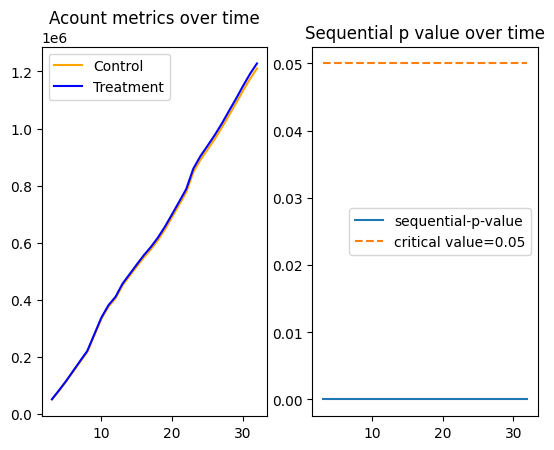

In [48]:
plt.subplot(1,2,1)
plt.title("Acount metrics over time")
plt.plot(abtest_metrics_df_filtered["time_since_start"],\
             abtest_metrics_df_filtered["count_c"]*abtest_metrics_df_filtered["mean_c"],\
         color="orange",label="Control")
plt.plot(abtest_metrics_df_filtered["time_since_start"],\
             abtest_metrics_df_filtered["count_t"]*abtest_metrics_df_filtered["mean_t"],\
         color="blue",label="Treatment")
plt.xlabel="Time since start"
plt.ylabel="Counts"
plt.legend()



plt.subplot(1,2,2)
plt.title("Sequential p value over time")
plt.plot(abtest_metrics_df_filtered["time_since_start"],abtest_metrics_df_filtered["sequential_p_value"],\
         label="sequential-p-value")
plt.plot(abtest_metrics_df_filtered["time_since_start"],[0.05]*len(abtest_metrics_df_filtered["time_since_start"]),\
         '--',label="critical value=0.05")
plt.xlabel="Time since start"
plt.ylabel="p-value"
plt.legend()

plt.show()




In [58]:
c=abtest_metrics_df_filtered['count_c'].to_list()
t=abtest_metrics_df_filtered['count_t'].to_list()
arr=np.array([c,t])
print(arr.shape)
print(arr[0,0])
print(arr[1,0])
arr=arr.T
print(arr.shape)
print(arr[0,0])
print(arr[0,1])
arr=abtest_metrics_df_filtered[['count_c','count_t']].to_numpy()
arr[0]

(2, 30)
148699.0
149336.0
(30, 2)
148699.0
149336.0


array([148699., 149336.])

[]

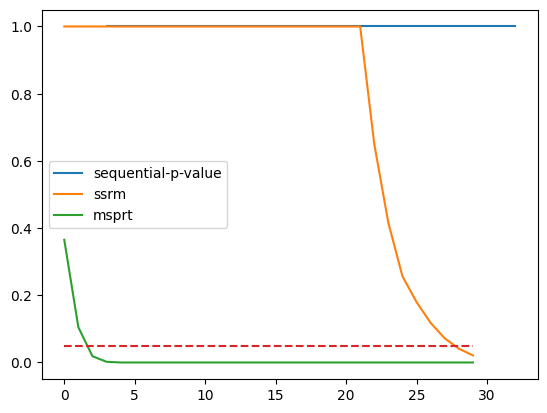

In [73]:
seq_p=ssrm_test.sequential_p_values(arr, [0.5,0.5])
plt.plot(abtest_metrics_df_filtered["time_since_start"],abtest_metrics_df_filtered["sequential_p_value"],\
         label="sequential-p-value")
plt.plot(seq_p,label="ssrm")
plt.plot(abtest_metrics_df_filtered['mSPRT-vanilla-p-value-aux'].to_numpy(),label="msprt")
plt.plot([0.05]*len(seq_p),"--")
plt.legend()
plt.plot()

In [65]:
abtest_metrics_df_filtered[['mSPRT-vanilla-p-value-aux','sequential_p_value']]

,mSPRT-vanilla-p-value-aux,sequential_p_value
24063,3.651604e-01,0.0
24064,1.049341e-01,0.0
24065,1.861765e-02,0.0
24066,2.063458e-03,0.0
24067,1.788174e-06,0.0
24068,1.215469e-06,0.0
24069,7.824607e-07,0.0
24070,6.325731e-07,0.0
24071,4.563442e-08,0.0
24072,2.983167e-08,0.0
